In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [84]:
# 表格形如以下形式，数据写入Excel即可调用RA函数
pd.DataFrame(np.ones(shape=(5, 5)),
             columns=['指标{}'.format(i) for i in range(5)],
             index=['对象{}'.format(i) for i in range(5)])

,指标0,指标1,指标2,指标3,指标4
对象0,1.0,1.0,1.0,1.0,1.0
对象1,1.0,1.0,1.0,1.0,1.0
对象2,1.0,1.0,1.0,1.0,1.0
对象3,1.0,1.0,1.0,1.0,1.0
对象4,1.0,1.0,1.0,1.0,1.0


# 灰色关联矩阵

\begin{equation*}
{{\zeta }_{i}}(k)=\frac{\underset{s}{\mathop{\min }}\,\underset{t}{\mathop{\min }}\,\left| {{x}_{0}}(t)-{{x}_{s}}(t) \right|+\rho \underset{s}{\mathop{\max }}\,\underset{t}{\mathop{\max }}\,\left| {{x}_{0}}(t)-{{x}_{s}}(t) \right|}{\left| {{x}_{0}}(k)-{{x}_{i}}(k) \right|+\rho \underset{s}{\mathop{\max }}\,\underset{t}{\mathop{\max }}\,\left| {{x}_{0}}(t)-{{x}_{s}}(t) \right|}
\end{equation*}
\begin{equation*}
x_0为参考数列
\end{equation*}


In [ ]:
# 数据归一化处理
正   反   
# 数值越大越好  还是越小越好

In [122]:
def minmin(x0, x):  #x0为参考数列；x为对象矩阵
    a = np.abs(x - x0)
    b = np.min(a, axis=1)
    return b.min()


def maxmax(x0, x):
    a = np.abs(x - x0)
    b = np.max(a, axis=1)
    return b.max()


def kesi(x0, x, amin, bmax, k, ro=0.5):
    c = np.abs(x - x0)
    kesi_k = (amin + ro * bmax) / (c + ro * bmax)
    return kesi_k.mean(axis=1).reshape(-1)


# 关联矩阵
def RA(x1, x):  #x,x均为矩阵
    amin = minmin(x1[0], x)
    bmax = maxmax(x1[0], x)
    res = kesi(x1[0], x, amin, bmax, 1, ro=0.5)
    for row in range(1, x1.shape[0]):
        x0 = x1[row]
        amin = minmin(x0, x)
        bmax = maxmax(x0, x)
        res1 = kesi(x0, x, amin, bmax, 1, ro=0.5)
        res = np.vstack((res, res1))
    return res

In [125]:
x0 = np.array([[8, 9, 8, 7, 5, 2, 9], [7, 8, 7, 5, 7, 3, 8]])

x = np.array([[7, 8, 7, 5, 7, 3, 8], [9, 7, 9, 6, 6, 4, 7],
              [6, 8, 8, 8, 4, 3, 6], [8, 6, 6, 9, 8, 3, 8],
              [8, 9, 5, 7, 6, 4, 8], [8, 9, 8, 7, 5, 2, 9],
              [7, 8, 7, 5, 7, 3, 8], [9, 7, 9, 6, 6, 4, 7],
              [6, 8, 8, 8, 4, 3, 6]])
x = np.random.normal(0, 1, (6, 9))

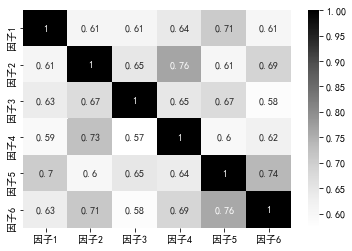

In [129]:
G = RA(x, x)
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号
fig, ax = plt.subplots(1, 1)  #必须这一句，不然无法show
sns.heatmap(G, cmap='Greys', annot=True)
plt.xticks(
    np.arange(x.shape[0]) + 0.5,
    ['因子{}'.format(i) for i in range(1, x.shape[0] + 1)])
plt.yticks(
    np.arange(x.shape[0]) + 0.5,
    ['因子{}'.format(i) for i in range(1, x.shape[0] + 1)])
plt.savefig(r'./灰色关联热力图.png', dpi=300)
plt.show()

# 完整代码

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号


def minmin(x0, x):  #x0为参考数列；x为对象矩阵
    a = np.abs(x - x0)
    b = np.min(a, axis=1)
    return b.min()


def maxmax(x0, x):
    a = np.abs(x - x0)
    b = np.max(a, axis=1)
    return b.max()


def kesi(x0, x, amin, bmax, k, ro=0.5):
    c = np.abs(x - x0)
    kesi_k = (amin + ro * bmax) / (c + ro * bmax)
    return kesi_k.mean(axis=1).reshape(-1)


# 关联矩阵
def RA(x1, x):  #x,x均为矩阵
    amin = minmin(x1[0], x)
    bmax = maxmax(x1[0], x)
    res = kesi(x1[0], x, amin, bmax, 1, ro=0.5)
    for row in range(1, x1.shape[0]):
        x0 = x1[row]
        amin = minmin(x0, x)
        bmax = maxmax(x0, x)
        res1 = kesi(x0, x, amin, bmax, 1, ro=0.5)
        res = np.vstack((res, res1))
    return res

In [ ]:
# 直接调用RA即可，注意数据归一化
# 已经导入MinMaxScaler